# Evaluate the impact of the number of LSTM layer on attention

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import sys
sys.path.append("./../src")

In [2]:
import spacy
import pickle
import torch
import matplotlib.pyplot as plt

from data.tokenizer import Tokenizer
from data.collate import *
from data.snli.dataset import *
from helpers import hightlight_txt

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

In [3]:
spacy_model = spacy.load('en_core_web_md')
tokenizer = Tokenizer(spacy_model=spacy_model)
labels = ['neutral', 'entailment']
cache_path = '../src/_out'
data_path='/Users/dunguyen/Dataset/snli'
nb_data = 20

In [13]:
vocab['red'].similarity(vocab['fly'])

0.27753168

In [4]:
def visualize(lemma1, lemma2, attention1, attention2, pred, y_true):
    html = '<table>'
    html += '<tr> <th>Document 1</th> <th>Document 2</th><th>Prediction</th><th>Label</th> </tr>'
    for i in range(attention1.size(0)):
        html += '<tr> <td>' +  hightlight_txt(lemma1[i], attention1[i]) + '</td><td>' + hightlight_txt(lemma2[i], attention2[i]) +'</td><td>' + str(pred[i].item()) +'</td><td>' + str(y_true[i].item()) +'</td></tr>'
    html += '</table>'
    return html

In [5]:
testset = VectorizeSNLIDataset(data_path=data_path, split='test', nb_data_max=nb_data, tokenizer=tokenizer, cache_path=cache_path)

collate_fn = VectorizingCollate(multiclass=True, padding_value=0)
test_iterator = DataLoader(testset, collate_fn=collate_fn, batch_size=nb_data, shuffle=False)

tokens1 = [tokenizer(d) for d in testset.data['sentence1']]
tokens2 = [tokenizer(d) for d in testset.data['sentence2']]

Load cache SNLI test: 100%|██████████| 1/1 [00:00<00:00, 15.40it/s, path=../src/_out/dataset/snli/snli_test.csv]


In [6]:
from model.multiclass_metamodel import MulticlassMetaModel

### 1BiLSTM

In [17]:
model_path = '/Users/dunguyen/Projects/IGRIDA/historic/2021-06-10/models/MulticlassMetaModel.1bilstm/best_model.pt'

model = MulticlassMetaModel(n_lstm=1, bidirectional=True)
model = torch.load(model_path, map_location=torch.device('cpu'))

# Evaluation mode
model.eval()
with torch.no_grad():
    for x1, x2, y_true in test_iterator:
        y_hat, (a1v2, a2v1) = model(x1, x2)
        y_hat = torch.argmax(y_hat, dim=1)
        a2v1 = a2v1.squeeze(dim=1)
        a1v2 = a1v2.squeeze(dim=1)

In [18]:
text = visualize(tokens1, tokens2, a2v1, a1v2, y_hat, y_true)
display(HTML(text))

Plot attention values

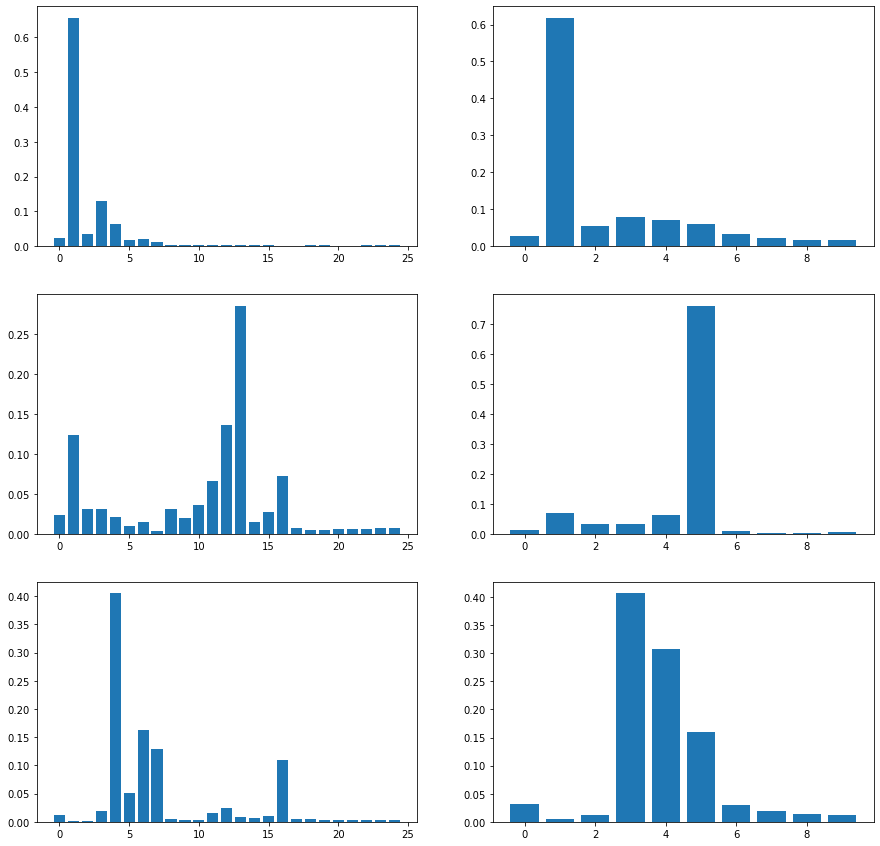

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

for i in range(3):
    ax[i][0].bar(range(a2v1[i].size(0)), a2v1[i].numpy())
    ax[i][1].bar(range(a1v2[i].size(0)), a1v2[i].numpy())

### 2biLSTM

In [10]:
model_path = '/Users/dunguyen/Projects/IGRIDA/historic/2021-06-10/models/MulticlassMetaModel.2bilstm/best_model.pt'

model = MulticlassMetaModel(n_lstm=1, bidirectional=True)
model = torch.load(model_path, map_location=torch.device('cpu'))

# Evaluation mode
model.eval()
with torch.no_grad():
    for x1, x2, y_true in test_iterator:
        y_hat, (a1v2, a2v1) = model(x1, x2)
        y_hat = torch.argmax(y_hat, dim=1)
        a2v1 = a2v1.squeeze(dim=1)
        a1v2 = a1v2.squeeze(dim=1)

In [11]:
# TODO: inversed role a2 and a1
text = visualize(tokens1, tokens2, a2v1, a1v2, y_hat, y_true)
display(HTML(text))

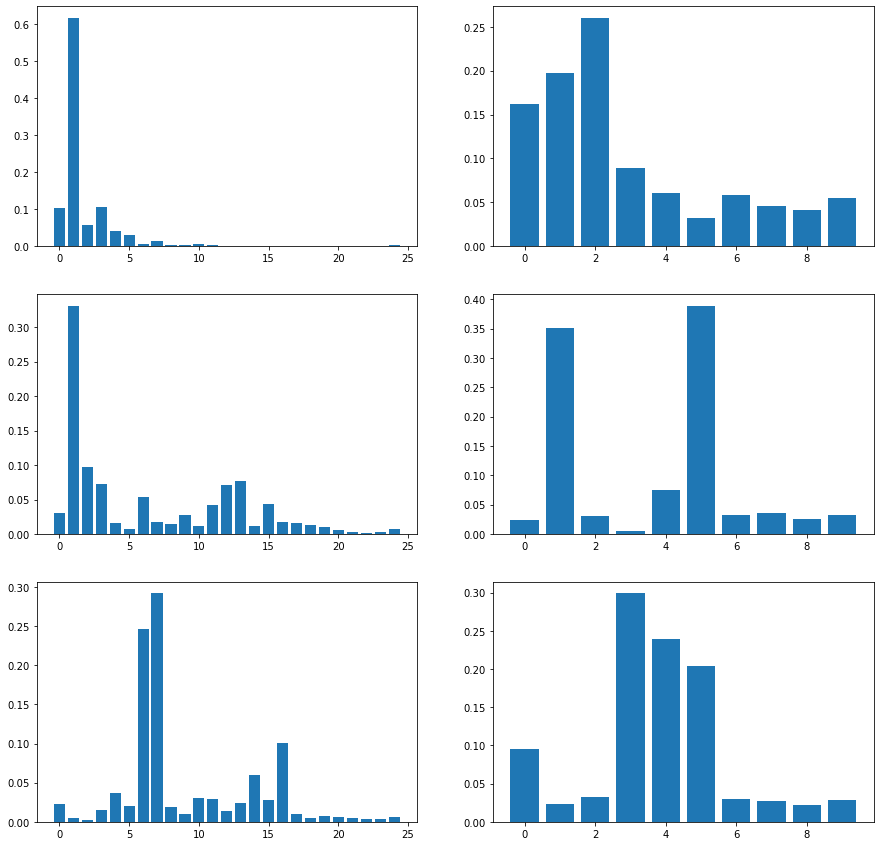

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

for i in range(3):
    ax[i][0].bar(range(a2v1[i].size(0)), a2v1[i].numpy())
    ax[i][1].bar(range(a1v2[i].size(0)), a1v2[i].numpy())

# 3 biLSTM

In [13]:
model_path = '/Users/dunguyen/Projects/IGRIDA/historic/2021-06-10/models/MulticlassMetaModel.3bilstm/best_model.pt'

model = MulticlassMetaModel(n_lstm=1, bidirectional=True)
model = torch.load(model_path, map_location=torch.device('cpu'))

# Evaluation mode
model.eval()
with torch.no_grad():
    for x1, x2, y_true in test_iterator:
        y_hat, (a1v2, a2v1) = model(x1, x2)
        y_hat = torch.argmax(y_hat, dim=1)
        a2v1 = a2v1.squeeze(dim=1)
        a1v2 = a1v2.squeeze(dim=1)

In [14]:
# TODO: inversed role a2 and a1
text = visualize(tokens1, tokens2, a2v1, a1v2, y_hat, y_true)
display(HTML(text))

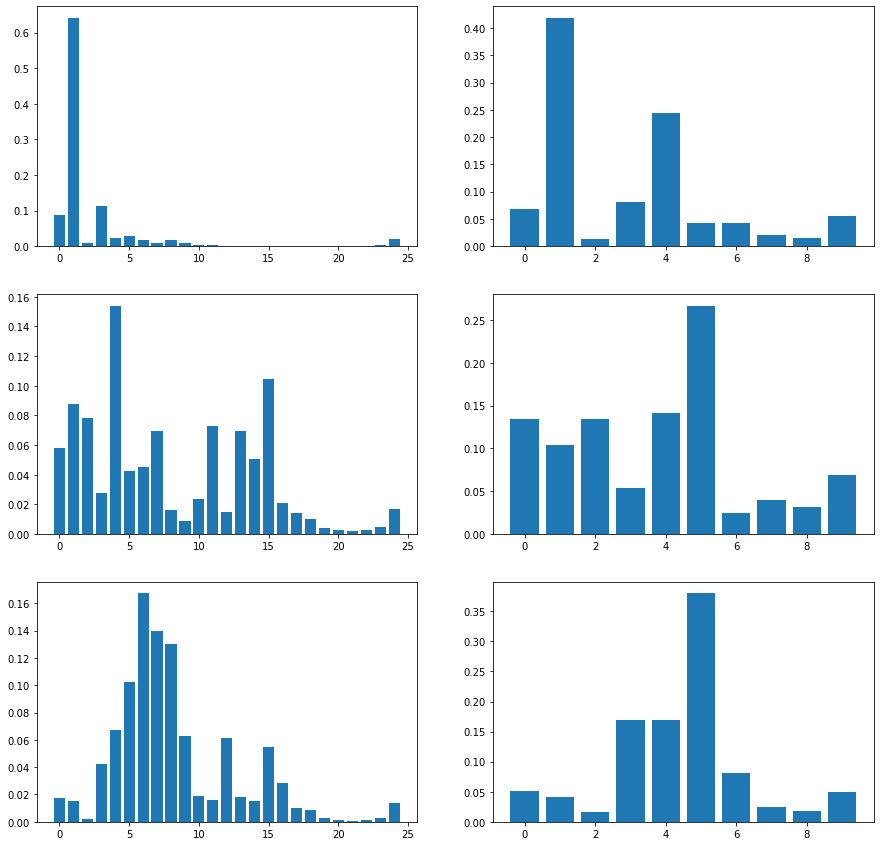

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

for i in range(3):
    ax[i][0].bar(range(a2v1[i].size(0)), a2v1[i].numpy())
    ax[i][1].bar(range(a1v2[i].size(0)), a1v2[i].numpy())

# Statistic of SNLI